# Import libraries
---

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

# Load and show data samples
---

In [2]:
digits_ds = load_digits()

In [3]:
digits_ds.images.shape

(1797, 8, 8)

In [4]:
X = digits_ds.images
y = digits_ds.target

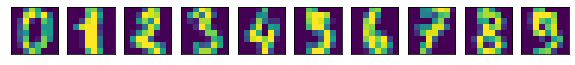

In [5]:
plt.figure(figsize=(10, 10))

for i in range(10):
  plt.subplot(1,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(X[i])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_train = X_train.reshape((len(X_train), 64))
X_test = X_test.reshape((len(X_test), 64))

In [8]:
X_train.shape

(1437, 64)

# Model
---

In [9]:
def create_model():
  model = Sequential()

  model.add(Dense(units=180, input_shape=(64,), activation=keras.activations.relu))
  model.add(Dense(units=128, activation=keras.activations.relu))
  model.add(Dense(units=64, activation=keras.activations.relu))
  model.add(Dropout(0.2))
  model.add(Dense(units=10, activation=keras.activations.softmax))

  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  return model

In [10]:
model = create_model()

In [12]:
model.fit(X_train, y_train, batch_size=180, epochs=25)

Epoch 1/25
8/8 [==============================] - 0s 4ms/step - loss: 3.7064 - accuracy: 0.1754
Epoch 2/25
8/8 [==============================] - 0s 3ms/step - loss: 1.4303 - accuracy: 0.5421
Epoch 3/25
8/8 [==============================] - 0s 4ms/step - loss: 0.9253 - accuracy: 0.7063
Epoch 4/25
8/8 [==============================] - 0s 4ms/step - loss: 0.5982 - accuracy: 0.8246
Epoch 5/25
8/8 [==============================] - 0s 4ms/step - loss: 0.4327 - accuracy: 0.8615
Epoch 6/25
8/8 [==============================] - 0s 4ms/step - loss: 0.3370 - accuracy: 0.8914
Epoch 7/25
8/8 [==============================] - 0s 3ms/step - loss: 0.2400 - accuracy: 0.9228
Epoch 8/25
8/8 [==============================] - 0s 3ms/step - loss: 0.1939 - accuracy: 0.9464
Epoch 9/25
8/8 [==============================] - 0s 3ms/step - loss: 0.1838 - accuracy: 0.9395
Epoch 10/25
8/8 [==============================] - 0s 4ms/step - loss: 0.1486 - accuracy: 0.9582
Epoch 11/25
8/8 [======================

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Accuracy: ", test_acc)

12/12 [==============================] - 0s 1ms/step - loss: 0.0443 - accuracy: 0.9917
Accuracy:  0.9916666746139526
